In [25]:
import numpy as np
from scipy.optimize import curve_fit


def better_curve_fit(func, xdata, ydata, lambda_len, n_trials=100):

    n_trials = 100

    err_best = np.inf
    lambda_best_ = None
    p0_best = None
    for _ in range(n_trials):
        p0 = np.random.default_rng().uniform(-10, 10, size=lambda_len)
        try:
            popt, pcov = curve_fit(func, xdata, ydata, p0=p0)
            err = ((func(xdata, *popt) - ydata) ** 2).sum()
            # print(err, lambda_)
            if err < err_best:
                err_best = err
                lambda_best_ = popt
                p0_best = p0
        except Exception:
            pass
    print(
        f"最佳初始参数: {p0_best}, 最佳拟合参数: {lambda_best_}, 最小误差: {err_best}"
    )
    return p0_best, lambda_best_

In [26]:
func = lambda x, a, b, c, d: a * np.exp(b * x) + c * x + d

xdata = np.linspace(0, 60, 3000)
ydata = 0.01 * np.exp(1.0 / 6.0 * xdata) + np.random.normal(0, 5, size=xdata.shape)

p0, popt = better_curve_fit(func, xdata, ydata, lambda_len=4)

/home/grl/develop/miniconda3/envs/math_env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1017: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/home/grl/develop/miniconda3/envs/math_env/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1055: RuntimeWarning: invalid value encountered in multiply
  pcov = pcov * s_sq
/tmp/ipykernel_9806/3855751377.py:16: RuntimeWarning: overflow encountered in square
  err = ((func(xdata, *popt) - ydata) ** 2).sum()
/tmp/ipykernel_9806/1712617860.py:1: RuntimeWarning: overflow encountered in exp
  func = lambda x, a, b, c, d: a * np.exp(b * x) + c * x + d
/tmp/ipykernel_9806/1712617860.py:1: RuntimeWarning: overflow encountered in multiply
  func = lambda x, a, b, c, d: a * np.exp(b * x) + c * x + d
/tmp/ipykernel_9806/3855751377.py:15: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(func, xdata, ydata, p0=p0)
/home/grl/develop/miniconda3/envs/math_e

最佳初始参数: [ 7.77940176  0.62173569 -2.06686479  5.54812103], 最佳拟合参数: [ 0.00900293  0.16842921  0.0172103  -0.30718807], 最小误差: 71846.79566433579


/tmp/ipykernel_9806/2646749217.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


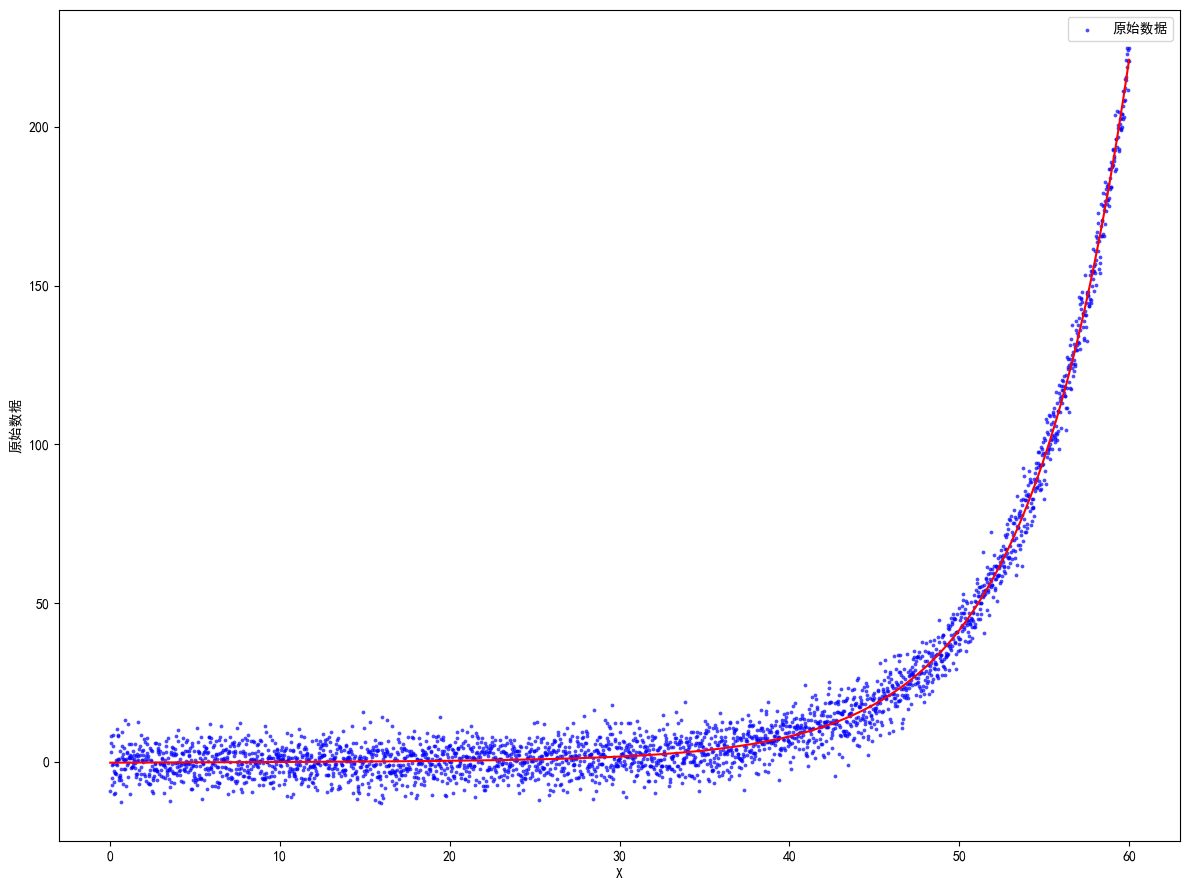

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

plt.figure(figsize=(12, 9))
sns.scatterplot(
    x=xdata,
    y=ydata,
    alpha=0.7,
    marker=".",
    s=30,
    lw=0,
    palette="deep",
    label="原始数据",
    color="blue",
)
plt.plot(xdata, func(xdata, *popt), color="red", label="拟合曲线")
plt.xlabel("X")
plt.ylabel("原始数据")
plt.tight_layout()
plt.show()